In [2]:
import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Episodes vs. Generations

In [3]:
def get_experiment_data(exp_name, variables):
    df = pd.DataFrame()
    seeds = []
    algorithms = []
    hyper_vars = []
    enviroments = []
    methods = []
    pops = []
    for v in variables:
        hyper_vars.append([])
    for method in os.listdir(f"./{exp_name}"):
        for alg in os.listdir(f"./{exp_name}/{method}"):
            for f in os.listdir(f"./{exp_name}/{method}/{alg}"):
                if str(f).endswith(".json"):
                    prefix = f[:-5] #removing .json
                    _, en, *var_vals = prefix.split(",")
                    with open(f"./{exp_name}/{method}/{alg}/{f}") as jf:
                        data = json.load(jf)
                        for seed, pop in data.items():
                            seeds.append(seed)
                            pops.append(pop)
                            methods.append(method)
                            algorithms.append(alg)
                            enviroments.append(en)
                            assert len(var_vals) < len(hyper_vars)
                            for i, v in enumerate(var_vals):
                                hyper_vars[i].append(v)
                            for z in range(i, len(hyper_vars)-1):
                                hyper_vars[i].append(None)


    df["seed"] = seeds
    df["pop"] = pops 
    df["criterion"] = methods
    df["alg"] = algorithms
    df["env"] = enviroments                    
    for i, v in enumerate(variables):
        df[v] = hyper_vars[i]
    return df

def pop_mean(pop):
    fitness = 0
    for ind in pop:
        fitness += ind[0][0]
    return fitness/len(pop)

def pop_std(pop):
    fitness = []
    for ind in pop:
        fitness += ind[0]
    return np.array(fitness).std()


def plot_ep_gen(df, enviroment):
    grps = df.groupby(by=["eps","gens"]).mean().reset_index(["eps","gens"])
    g = sns.FacetGrid(data=grps, col="eps")
    g.map(sns.lineplot, "gens","mean_fit")
    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f"{enviroment} - episode count influence on final fitness")

    g = sns.FacetGrid(data=grps, col="eps")
    g.map(sns.lineplot, "gens","std_fit")
    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f"{enviroment} - episode count influence on fitness distribution")

    g = sns.FacetGrid(data=grps, col="gens")
    g.map(sns.lineplot, "eps","mean_fit")
    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f"{enviroment} - generation count influence on fitness")

    g = sns.FacetGrid(data=grps, col="gens")
    g.map(sns.lineplot, "eps","std_fit")
    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f"{enviroment} - generation count influence on fitness distribution")



In [4]:
edf = get_experiment_data("ep_gen", ["gens", "eps"])
edf["mean_fit"] = edf["pop"].map(pop_mean)
edf["std_fit"] = edf["pop"].map(pop_std)
edf["gens"]=edf["gens"].map(lambda x: int(x[1:]))
edf["eps"]=edf["eps"].map(lambda x: int(x[1:]))
diffs = edf.groupby("alg").get_group("diff")
lambdas = edf.groupby("alg").get_group("lambda")

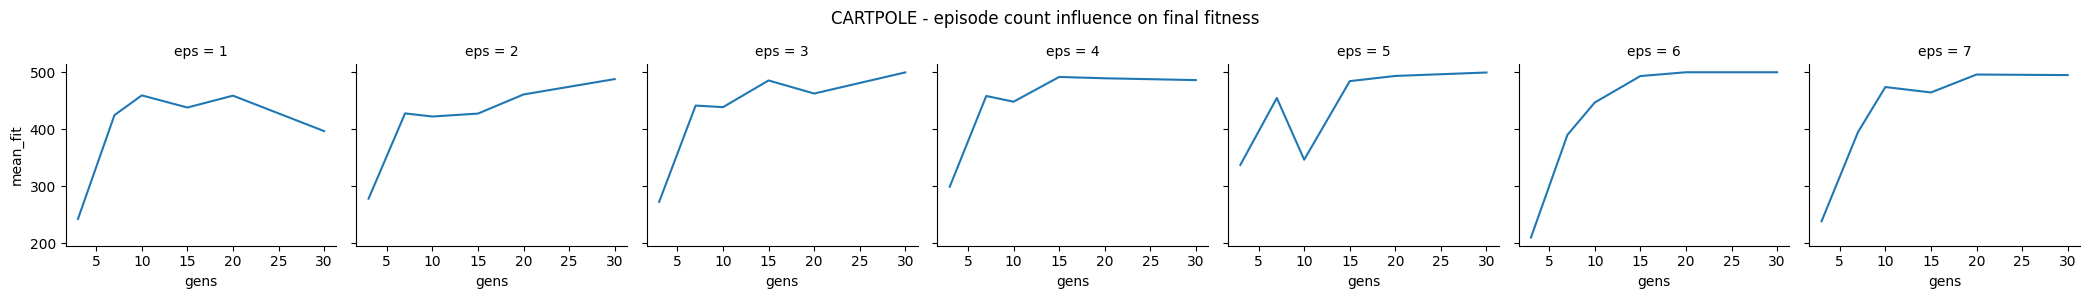

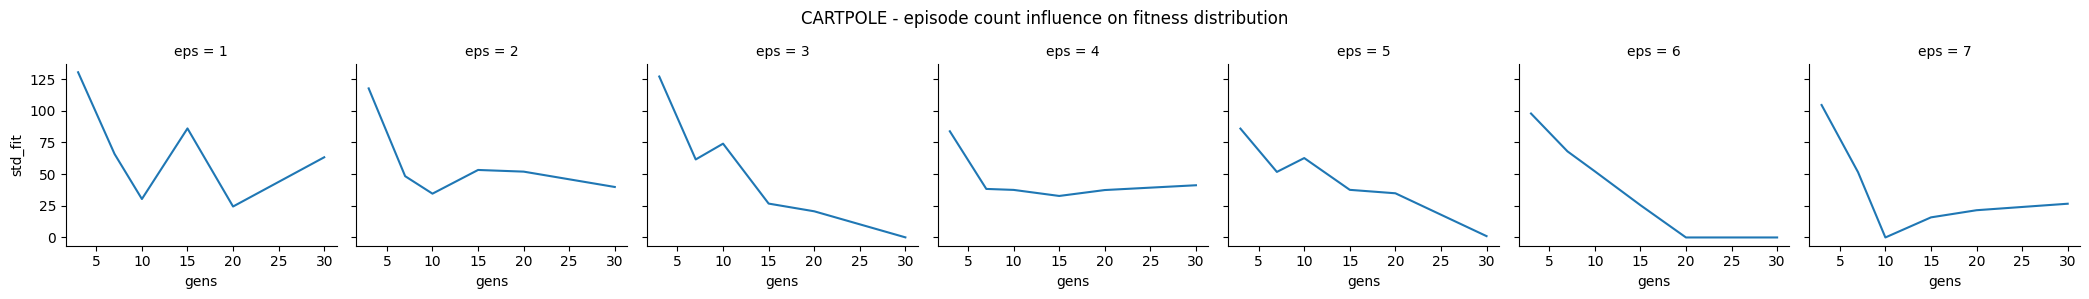

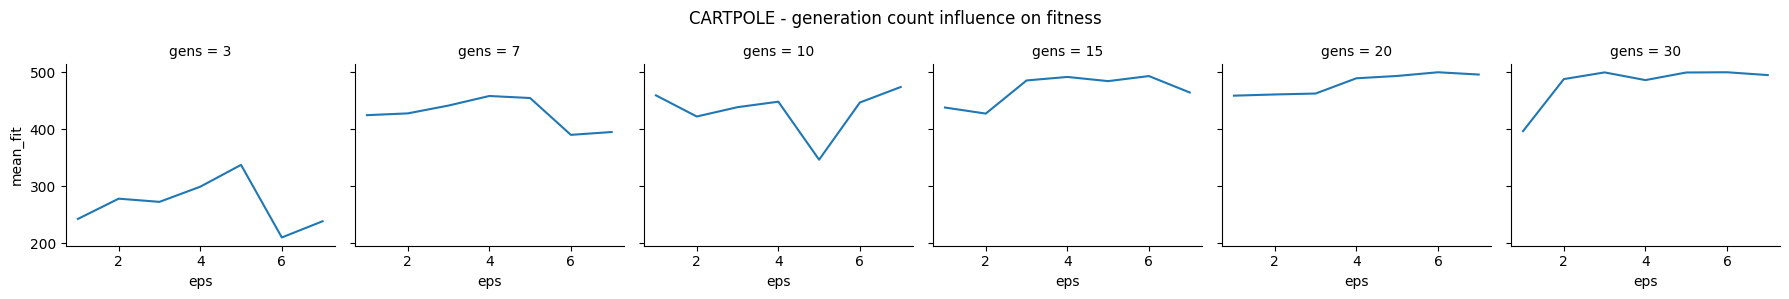

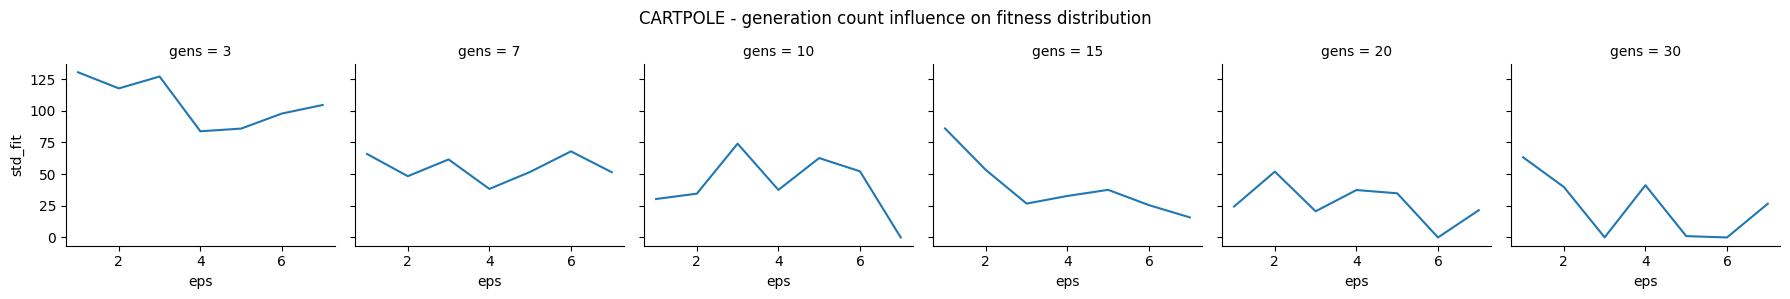

In [5]:
plot_ep_gen(lambdas,"CARTPOLE")

In [6]:
plot_ep_gen(diffs, "CARPOLE")

In [7]:
diffs.corr()

,gens,eps,mean_fit,std_fit
gens,1.000000e+00,-8.285189e-18,0.776117,0.033520
eps,-8.285189e-18,1.000000e+00,0.018896,-0.268401
mean_fit,7.761170e-01,1.889623e-02,1.000000,0.273257
std_fit,3.351991e-02,-2.684008e-01,0.273257,1.000000


In [8]:
lambdas.corr()

,gens,eps,mean_fit,std_fit
gens,1.000000e+00,-2.761730e-18,0.580595,-0.486672
eps,-2.761730e-18,1.000000e+00,0.064987,-0.205984
mean_fit,5.805946e-01,6.498749e-02,1.000000,-0.600107
std_fit,-4.866717e-01,-2.059843e-01,-0.600107,1.000000


# Mutation/Crossover Search


In [12]:
fdf = get_experiment_data("fit_grid", ["cross_rate", "mut_rate"])
fdf

IndexError: list index out of range